In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Problem 2: Leukemia Diagnosis

In [2]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/leukemia.csv'
data = pd.read_csv(url)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16054,16055,16056,16057,16058,16059,16060,16061,16062,label
0,-73.0,-69.0,-48.0,13.0,-86.0,-147.0,-65.0,-71.0,-32.0,100.0,...,352.0,-67.0,121.0,-5.0,-11.0,-21.0,-41.0,-967.0,-120.0,1
1,-16.0,-63.0,-97.0,-42.0,-91.0,-164.0,-53.0,-77.0,-17.0,122.0,...,244.0,-15.0,119.0,-32.0,4.0,-14.0,-28.0,-205.0,-31.0,1
2,4.0,-45.0,-112.0,-25.0,-85.0,-127.0,56.0,-110.0,81.0,41.0,...,163.0,-14.0,7.0,15.0,-8.0,-104.0,-36.0,-245.0,34.0,1
3,-31.0,-110.0,-20.0,-50.0,-115.0,-113.0,-17.0,-40.0,-17.0,80.0,...,625.0,18.0,59.0,-10.0,32.0,-2.0,10.0,-495.0,-37.0,1
4,-33.0,-39.0,-45.0,14.0,-56.0,-106.0,73.0,-34.0,18.0,64.0,...,398.0,38.0,215.0,-2.0,44.0,3.0,68.0,-293.0,-34.0,1


This dataset contains cancer gene-expression levels (16,063 genes, 198 samples) from the paper [*Multiclass cancer diagnosis using tumor gene expression signatures (Golub et all, 2001)*](http://cbcl.mit.edu/publications/ps/rifkin-pnas-2001.pdf)

Cancer classes are labelled as follows:


- 1: breast
- 2:  prostate
- 3:  lung
- 4:  collerectal
- 5:  lymphoma
- 6:  bladder
- 7:  melanoma
- 8:  uterus
- 9:  **leukemia**
- 10: renal
- 11: pancreas
- 12: ovary
- 13: meso
- 14: cns


Your goal is to train a regression model to classify cancers as either leukemia or not-leukemia

**Part 1:** Replace the `label` values with:


$$
f(\text{cancer}) =
\begin{cases}
1 & \text{if cancer is leukemia} \\
0 & \text{if cancer is not leukemia}
\end{cases}
$$


In [3]:
# if label is 9, replace it with -1
data['label'] = data['label'].replace(9,-1)
# if label is not 9, replace it with 0
data['label'] = data['label'].replace([0,1,2,3,4,5,6,7,8,10,11,12,13,14],0)
# if label is -1, replace it with 1
data['label'] = data['label'].replace(-1,1)

In [4]:
# show label distribution
data['label'].value_counts()

0    168
1     30
Name: label, dtype: int64

**Part 2:** Define X and y from the DataFrame, and then split X and y into training and testing sets

In [5]:
from sklearn.model_selection import train_test_split
# feature matrix X, target vector y
X = data.drop('label',axis=1)
y = data['label']
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

**Part 3:** Use the training set to train a **Lasso regression model**. 
Plot the model's coefficients. How many coefficients are equal to 0?

In [6]:
from sklearn.linear_model import Lasso

# Lasso model
lasso_reg = Lasso(alpha=0.01, max_iter=10000)

# fit the model to the training data
lasso_reg.fit(X_train,y_train)

# predict on the test set
y_pred = lasso_reg.predict(X_test)

# compute the accuracy
from sklearn.metrics import accuracy_score
print('accuracy =',accuracy_score(y_test,y_pred.round()))

# show the coefficients equal to 0
print('number of coefficients equal to 0:',sum(lasso_reg.coef_==0)) 

accuracy = 1.0
number of coefficients equal to 0: 15710


**Part 4:**  Use your regression model to classify all the cancers in the test set.  
Use the rule:

$$
\text{classify cancer as} \begin{cases}
\text{leukemia} & \text{if } y{\text{test\_pred}} > 0.5 \\
\text{not leukemia} & \text{if } y{\text{test\_pred}} \leq 0.5
\end{cases}
$$



In [7]:
y_test_pred = lasso_reg.predict(X_test)

# accuracy
from sklearn.metrics import accuracy_score
print('accuracy =',accuracy_score(y_test,y_test_pred.round()))

accuracy = 1.0


How many cancers are misclassified? 

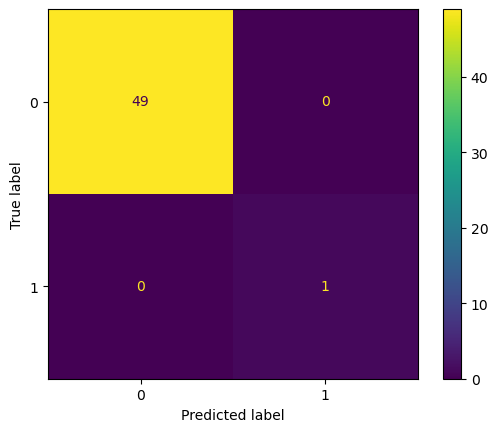

In [9]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

cm = confusion_matrix(y_test,y_test_pred.round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()